In [23]:
#Import The Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
#Import The Data
industry_data = pd.read_csv('Industry_Portfolios.csv', header=0, index_col=0)

In [25]:
#Create Mean and Covaiance Matrix
R = np.array([industry_data[i].mean() for i in industry_data]) 
V = industry_data.cov()

In [26]:
#Simulation Count
sim = 100_000

In [27]:
#Empty List to Append Mean and Standard Deviation after Simulation runs
portfolio_mean = []
portfolio_std = []

In [28]:
#Running the Simulation
for i in range(sim):
    random_int = np.random.rand(10) #Generate 10 random numberd
    weights = (random_int/random_int.sum()) #Divide by sum to get weight.sum() = 1
    mean_p = R@weights #Calculate mean of portfolio in a temporary variable for iteration
    std_p = np.sqrt(weights.T@(V@weights)) #Calculate std of portfolio in a temporary variable for iteration
    portfolio_mean.append(mean_p) #Append it in the list created above
    portfolio_std.append(std_p) #Append it in the list created above

In [29]:
#Make a DataFrame of the same for faster processing
portfolio_mean = pd.DataFrame(portfolio_mean) 
portfolio_std = pd.DataFrame(portfolio_std) 

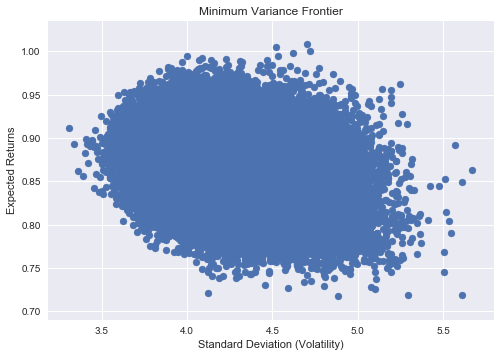

In [30]:
#Plot for 'w' (Return vs Volatility)
plt.style.use('seaborn')
plt.scatter(x=portfolio_std, y=portfolio_mean)
plt.xlabel('Standard Deviation (Volatility)')
plt.ylabel('Expected Returns')
plt.title('Minimum Variance Frontier')
plt.show()

In [31]:
portfolio_mean1 = []
portfolio_std1 = []

In [32]:
for i in range(sim):
    random_int_1 = np.random.rand(10)
    random_int_1 = 1/random_int_1 #Make it 1/w
    weights_1 = (random_int_1/random_int_1.sum())
    mean_p1 = R@weights_1
    std_p1 = np.sqrt(weights_1.T@(V@weights_1))
    portfolio_mean1.append(mean_p1)
    portfolio_std1.append(std_p1)

In [33]:
#Append in Lists
portfolio_mean1 = pd.DataFrame(portfolio_mean1)
portfolio_std1 = pd.DataFrame(portfolio_std1)

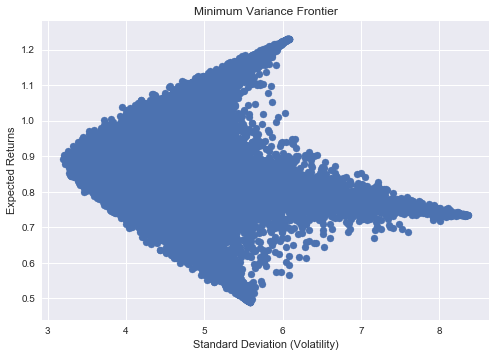

In [34]:
#Plot for '1/w' (Return vs Volatility)
plt.style.use('seaborn')
plt.scatter(x=portfolio_std1, y=portfolio_mean1)
plt.xlabel('Standard Deviation (Volatility)')
plt.ylabel('Expected Returns')
plt.title('Minimum Variance Frontier')
plt.show()